

# Project: Investigate a Dataset- Hospital Appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction

### Dataset Description
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row


In this project we will answer some question on why patients miss their scheduled appointment. We will be predicting some of the factors that affecting patient attendance in the Hospital.


### Question(s) for Analysis

Does the patient Gender and Age has any effect on attendance?
Does receiving SMS remainder increase the chance of a patient showing for their appointment?
Does the location or neighborhood  of the patient play a role in missing or showing up for appointment?
Does the disease type affect the patient's that show up or missed  appointment?



In [1]:
# Python Data Analysis Library
import pandas as pd 

# NumPy is the fundamental package for scientific computing in Python
import numpy as np

# Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy
import matplotlib.pyplot as plt

# It sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

# Seaborn is a library for making statistical graphics in Python.
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [2]:
# Load the datasets using pandas
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# Get the dataframe
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df.shape

(110527, 14)

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
   #gives the number of missing values for each variable
df.dropna()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
#here we will be droping columns we are not exploring for this analysis
df.drop(['PatientId','AppointmentID','Scholarship'], axis=1, inplace=True)

In [9]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,1,1,0,0,0,No


In [10]:
#we will be changing the scheduled day and appointment day to datetime datatype not string(object
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [11]:
#we will check at the value count
df.nunique()

Gender              2
ScheduledDay      111
AppointmentDay     27
Age               104
Neighbourhood      81
Hipertension        2
Diabetes            2
Alcoholism          2
Handcap             5
SMS_received        2
No-show             2
dtype: int64

In [12]:

df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,1,1,0,0,0,No


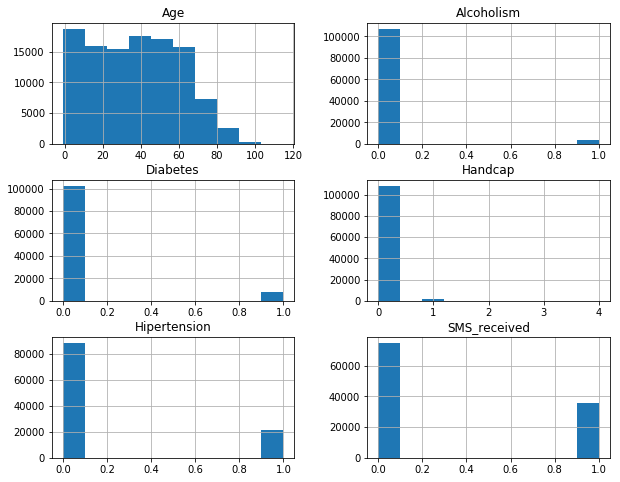

In [13]:
#we will make our data more clear to read through visualization
df.hist( figsize=(10,8));

In [14]:
#some columns are missed spelled we are now going to correct those spellings
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived'})

In [15]:
#We will also be renaming the No-show column to Absent

df['No_show'] = df['No-show'].apply(lambda x: 'Present' if x == "No" else 'Absent')
df = df.drop('No-show', 1)

#Renaming Gender to Sex
df.rename( columns={'Gender':'Sex'} ,inplace=True)


In [16]:
df.isnull().sum()

Sex               0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMSReceived       0
No_show           0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
Sex               110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMSReceived       110527 non-null int64
No_show           110527 non-null object
dtypes: datetime64[ns](2), int64(6), object(3)
memory usage: 9.3+ MB


In [18]:
df.fillna(df.mean(),inplace=True)

In [19]:
df.dropna(inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question Are women more likely to showup for schedule appointments than men? Are young people showing up for appointment more? Do recieving SMS encourage more attendance?

In [20]:
#Does the patient Gender and Age has any effect on attendance?

In [21]:
#check the Sex count of patient
df['Sex'].value_counts()

F    71840
M    38687
Name: Sex, dtype: int64

In [22]:
Present = df.No_show == True
Absent = df.No_show == False
df.Sex[Present].mean()
df.Sex[Absent].mean()


nan

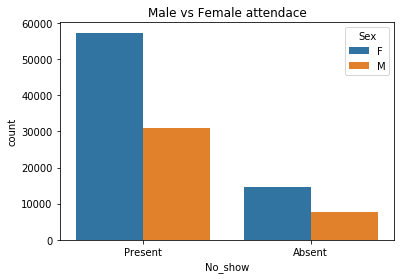

In [28]:
sns.countplot(x=df['No_show'], hue=df['Sex']);
plt.title('Male vs Female attendace');

In [ ]:
Now we will look at the Age distribution of patient showing to their appointment

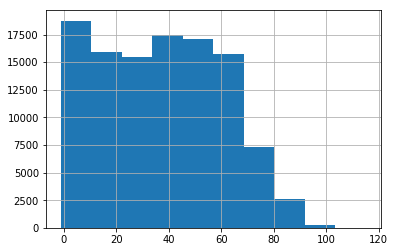

In [24]:
#show the age of patient
df['Age'].hist(bins=10);

These data tells us that most of the patients are of young age 

In [25]:
#We will be dividing Age into segments 
df['Age'] = [round(a,-1) for a in df['Age']] 

In [26]:
#check the Age count of patient
df['Age'].value_counts()

40     15960
60     15628
20     15342
50     14012
30     13026
0      11732
10     11526
70      7365
80      4776
90      1090
100       65
120        5
Name: Age, dtype: int64

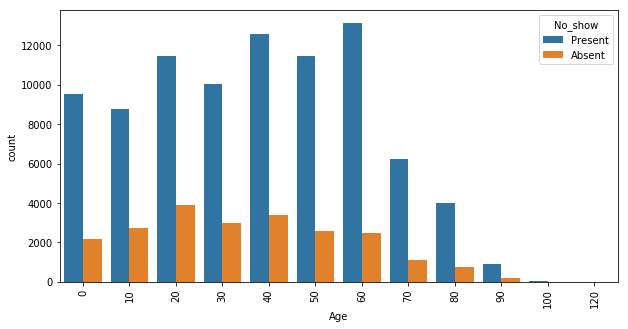

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Age'], hue=df['No_show'])
plt.xticks(rotation=90);

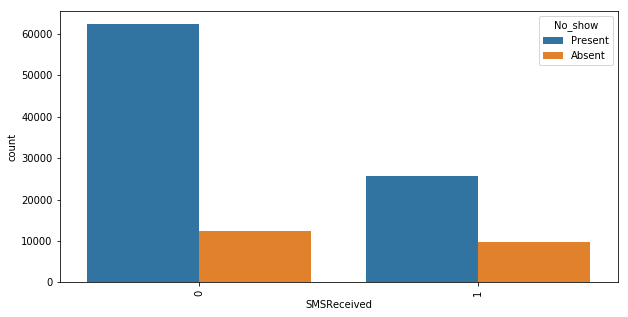

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['SMSReceived'], hue=df['No_show'])
plt.xticks(rotation=90);

Now we will see if the location or neighborhood  of the patient play a role in missing or showing up for appointment

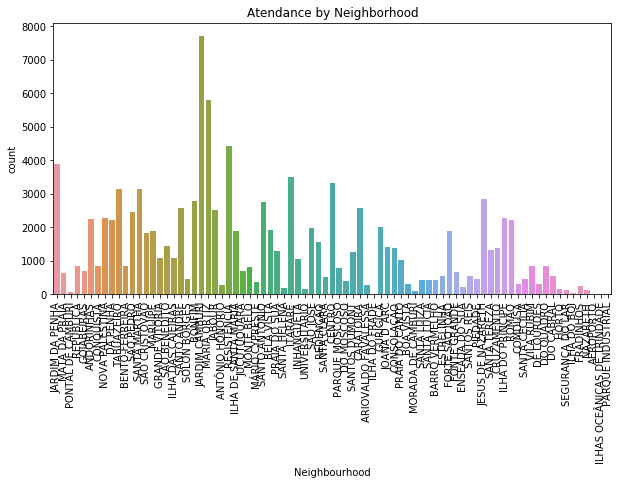

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.Neighbourhood);
plt.title('Atendance by Neighborhood')
plt.xticks(rotation=90);

Now we will see that some neighborhood have more people showing up for their appointmentit can be an indication of that this area have high rate of diseases

### Research Question 2  Are people  with diseases showing up for appointment more

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 11 columns):
Sex               110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMSReceived       110527 non-null int64
No_show           110527 non-null object
dtypes: datetime64[ns](2), int64(6), object(3)
memory usage: 15.1+ MB


In [40]:
disease_columns = df[['Hypertension','Diabetes','Alcoholism','Handicap']]

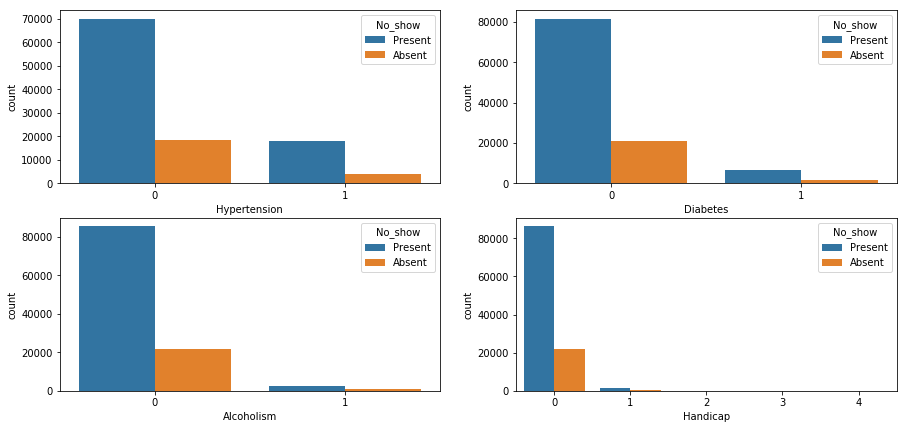

In [46]:
plt.figure(figsize=(15,7));
plt.subplot(2,2,1)
sns.countplot(disease_columns['Hypertension'],hue=df['No_show'])
plt.subplot(2,2,2)
sns.countplot(disease_columns['Diabetes'],hue=df['No_show'])
plt.subplot(2,2,3)
sns.countplot(disease_columns['Alcoholism'],hue=df['No_show'])
plt.subplot(2,2,4)
sns.countplot(disease_columns['Handicap'],hue=df['No_show']);

When we look at the data we will notice that most of the patient that show up  don't have any disease but also patients with hypertension show up more than people with diabites and hypertension, but people with handicap are less likely to show up.


<a id='conclusions'></a>

## Conclution

In conclution, during this data analysis we have seen that women and young people show up mostly for their appointment than men and old people. Also peolpe who recieved SMS mostly showed up for thier appointment. There are alot of patient turn around in some Neighbourhood but people with diseases dont usually come for their appointment even though a few did show up.




In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0